In [2]:
%matplotlib inline

In [3]:
from __future__ import print_function

In [4]:
import h5py
import cPickle as pickle

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [17]:
from ToyMC.utils.Utils import is_logarithmic

In [13]:
LEVEL = 7
NAME = '12585'
INFILE = NAME+'.pkl'
WEIGHT_FILE = NAME+'_weights.hdf5'
X_PARMS = ['energy']
Y_PARMS = ['nfp', 'nfpip', 'nfpim', 'nfkp', 'nfkm', 'nfother']
BINNING = np.logspace(0, 3, 100)
#BINNING =np.linspace(0, 4, 100)
X_LABEL = 'E'

In [14]:
infile = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level'+str(LEVEL)+'/'+INFILE
inweights = '/data/icecube/data/mlarson/level7_24Nov2015/GENIE_parms/level'+str(LEVEL)+'/'+WEIGHT_FILE
input_file = pickle.load(open(infile, 'rb'))
weights = np.array(h5py.File(inweights, 'r')['weights'][:])

In [18]:
print(sorted(input_file.keys()))
print(weights.shape)

NameError: name 'input_file' is not defined

In [15]:
weights *= 3600 * 24 * 365
if LEVEL == 0:
    weights /= 3.
elif LEVEL == 7:
    if '12585' in INFILE:
        weights /= 275.
    elif '14585' in INFILE:
        weights /= 245.

In [57]:
def make_plot(hist, tot_hist, name, xlabel, ylabel, outname, level):
    names = ['qel', 'res', 'dis']
    percent_hist = [x / tot_hist.astype(float) for x in hist]

    fig = plt.figure(figsize=[10, 8])
    if LEVEL == 0:
        fig.suptitle('Level0 (Generator level) '+name, y=1.005)
    else:
        fig.suptitle('Level7 (Final level) '+name, y=1.005)
    gs = gridspec.GridSpec(1, 1)
    gs0 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0], hspace=0, height_ratios=[1,1] )
    
    ax0 = fig.add_subplot(gs0[0])
    ax0.set_xlim([1E0, 30])
    ax0.set_ylim([1E0, 1E5])
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha =0.7, linewidth=1)
    ax0.get_xaxis().set_ticks([])
    ax0.set_ylabel('# Events', size=18)
    
    zero_numpy_array_element = np.array([0])
    hist = np.hstack((tot_hist, zero_numpy_array_element))                                                                                                                           
    ax0.step(BINNING, hist, where='post', color='black')
    at = AnchoredText(r'Total # Events = {0}'.format(np.sum(tot_hist)),
                      prop=dict(size=16), frameon=True, loc=2)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.5")
    ax0.add_artist(at)
    
    ax1 = fig.add_subplot(gs0[1])
    ax1.set_xlabel(xlabel, size=18)
    # r'True E$_{\nu}$(GeV)'
    ax1.set_xlim([1E0, 30])
    ax1.set_xscale('log')
    for xmaj in ax1.xaxis.get_majorticklocs():
        ax1.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    for ymaj in ax1.yaxis.get_majorticklocs():
        ax1.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    ax1.set_ylabel(ylabel, size=18)
    ax1.set_ylim([0, 1.1])
    
    zero_numpy_array_element = np.array([0])
    for idx, x in enumerate(percent_hist):
        hist = np.hstack((x, zero_numpy_array_element))                                                                                                                           
        ax1.step(BINNING, hist, where='post', label=names[idx])

    ax1.legend()

    fig.tight_layout()
    # fig.savefig('./test.pdf', bbox_inches='tight')
    fig.savefig(outname, bbox_inches='tight')

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


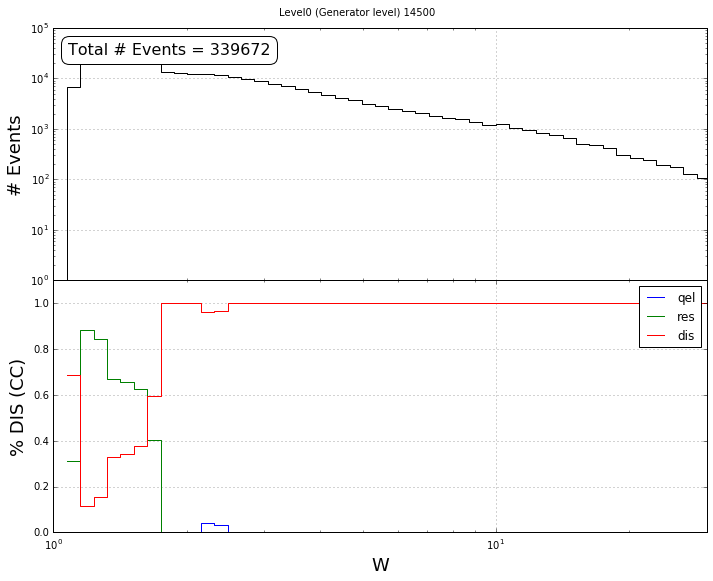

In [58]:
parm = 'Ws'
cc_map = input_file['cc'].astype(bool)
dis_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['dis'][cc_map].astype(bool)], bins=BINNING
)
res_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['res'][cc_map].astype(bool)], bins=BINNING
)
qel_hist, edges = np.histogram(
    (input_file[parm][cc_map])[input_file['qel'][cc_map].astype(bool)], bins=BINNING
)
all_hist, edges = np.histogram(
    input_file[parm][cc_map], bins=BINNING
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14500', r'W', r'% DIS (CC)', './images/level0/W/14500_cc.png', 0)

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


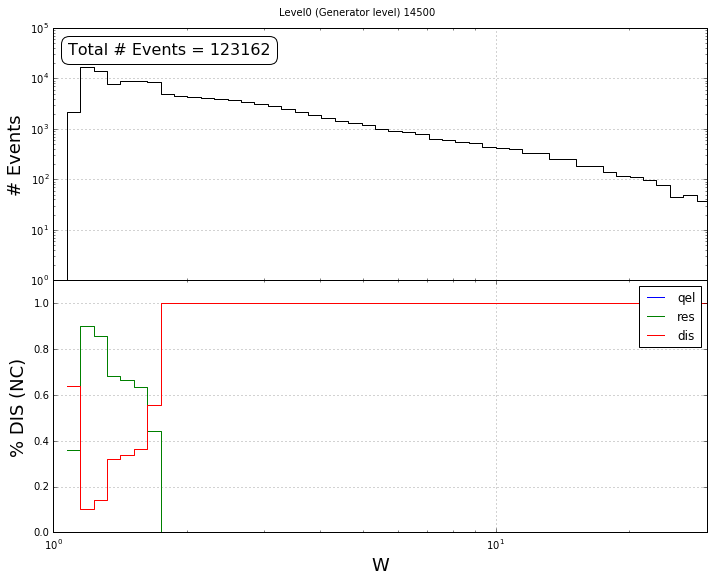

In [59]:
parm = 'Ws'
nc_map = input_file['nc'].astype(bool)
dis_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['dis'][nc_map].astype(bool)], bins=BINNING
)
res_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['res'][nc_map].astype(bool)], bins=BINNING
)
qel_hist, edges = np.histogram(
    (input_file[parm][nc_map])[input_file['qel'][nc_map].astype(bool)], bins=BINNING
)
all_hist, edges = np.histogram(
    input_file[parm][nc_map], bins=BINNING
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14500', r'W', r'% DIS (NC)', './images/level0/W/14500_nc.png', 0)

/.data/mandalia/programs/anaconda2/envs/pisa/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


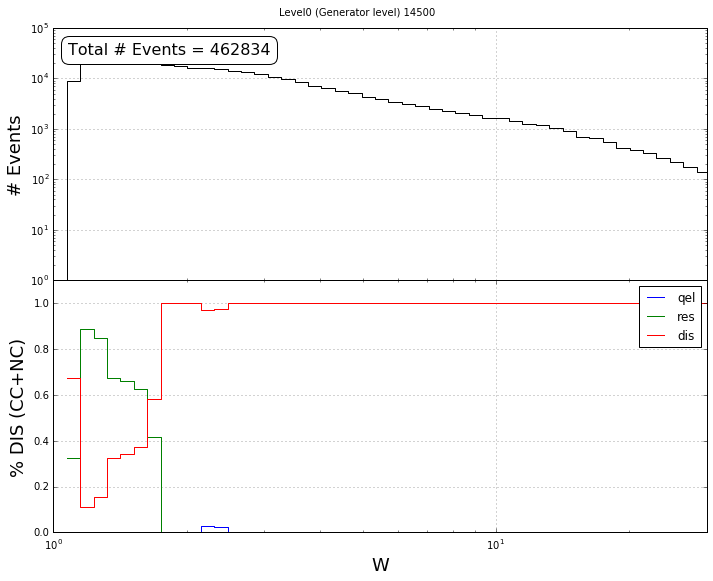

In [10]:
parm = 'Ws'
dis_hist, edges = np.histogram(
    input_file[parm][input_file['dis'].astype(bool)], bins=BINNING
)
res_hist, edges = np.histogram(
    input_file[parm][input_file['res'].astype(bool)], bins=BINNING
)
qel_hist, edges = np.histogram(
    input_file[parm][input_file['qel'].astype(bool)], bins=BINNING
)
all_hist, edges = np.histogram(
    input_file[parm], bins=BINNING
)
make_plot((qel_hist, res_hist, dis_hist), all_hist, '14500', r'W', r'% DIS (CC+NC)', './images/level0/W/14500_all.png', 0)